### Step 1: Boxplot performance difference GPU inference latency calc. in latency_testing.ipynb

In [2]:
import pandas as pd
H100_lat = pd.read_csv('performance_results/H100_latency.csv')
H100_lat_ft = pd.read_csv('performance_results/H100_latency_ft.csv')
A100_lat = pd.read_csv('performance_results/A100_latency.csv')
A100_lat_ft = pd.read_csv('performance_results/A100_latency_ft.csv')

V100_lat = pd.read_csv('performance_results/V100_latency1.csv')
V100_lat_ft = pd.read_csv('performance_results/V100_latency_ft.csv')
L40S_lat = pd.read_csv('performance_results/L40S_latency.csv')
L40S_lat_ft = pd.read_csv('performance_results/L40S_latency_ft.csv')

df_latency = pd.concat([H100_lat, H100_lat_ft, L40S_lat, L40S_lat_ft, A100_lat, A100_lat_ft,  V100_lat, V100_lat_ft], axis = 1)

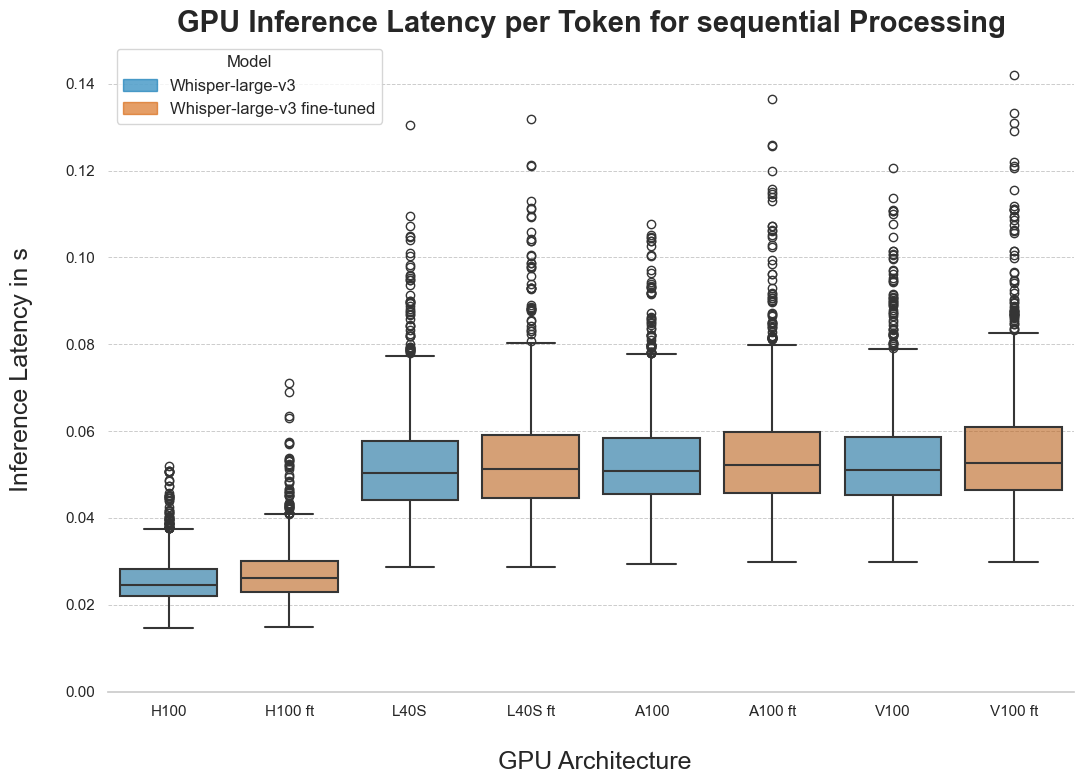

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


plt.figure(figsize=(11, 8))
sns.set(style="whitegrid")  


custom_colors = ['#0072B2', '#D55E00','#0072B2', '#D55E00','#0072B2', '#D55E00','#0072B2', '#D55E00']   # color template
ax = sns.boxplot(data=df_latency, palette=custom_colors, linewidth=1.5)   # initialize boxplot

# Loop over the boxes and set alpha transparency
for patch in ax.patches:
    color_with_alpha = patch.get_facecolor()[:3] + (0.6,)  # alpha = 0.6
    patch.set_facecolor(color_with_alpha)

# Add custom legend
whisper_legend = mpatches.Patch(color='#0072B2', label='Whisper-large-v3', alpha = 0.6)
fine_tuned_legend = mpatches.Patch(color='#D55E00', label='Whisper-large-v3 fine-tuned' , alpha = 0.6)
plt.legend(handles=[whisper_legend, fine_tuned_legend], loc='upper left', fontsize=12, title='Model')

# Add annotation and customize outlay
plt.title('GPU Inference Latency per Token for sequential Processing', fontsize=21, fontweight='bold')
plt.xlabel('\n GPU Architecture', fontsize=18)
plt.ylabel('Inference Latency in s \n', fontsize=18)
plt.ylim((0, 0.15))

sns.despine(left=True)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

plt.savefig('performance_results/GPU_inference_latency.png', dpi=180)
plt.show()


### Step 2: Visualize difference in Word Error Rate (WER) before and after fine-tuning

In [56]:
# the forward pass for the prediction is identical for each device, resulting in same Word Error Score
import pandas as pd
L40S_wer = pd.read_csv('performance_results/L40S_wer.csv').rename({'WER L40S':'Whisper-large-v3'}, axis = 1)
L40S_wer_ft = pd.read_csv('performance_results/L40S_wer_ft.csv').rename({'WER L40S ft':'Whisper-large-v3-fine-tuned'}, axis = 1)
df = pd.concat([L40S_wer, L40S_wer_ft], axis = 1)

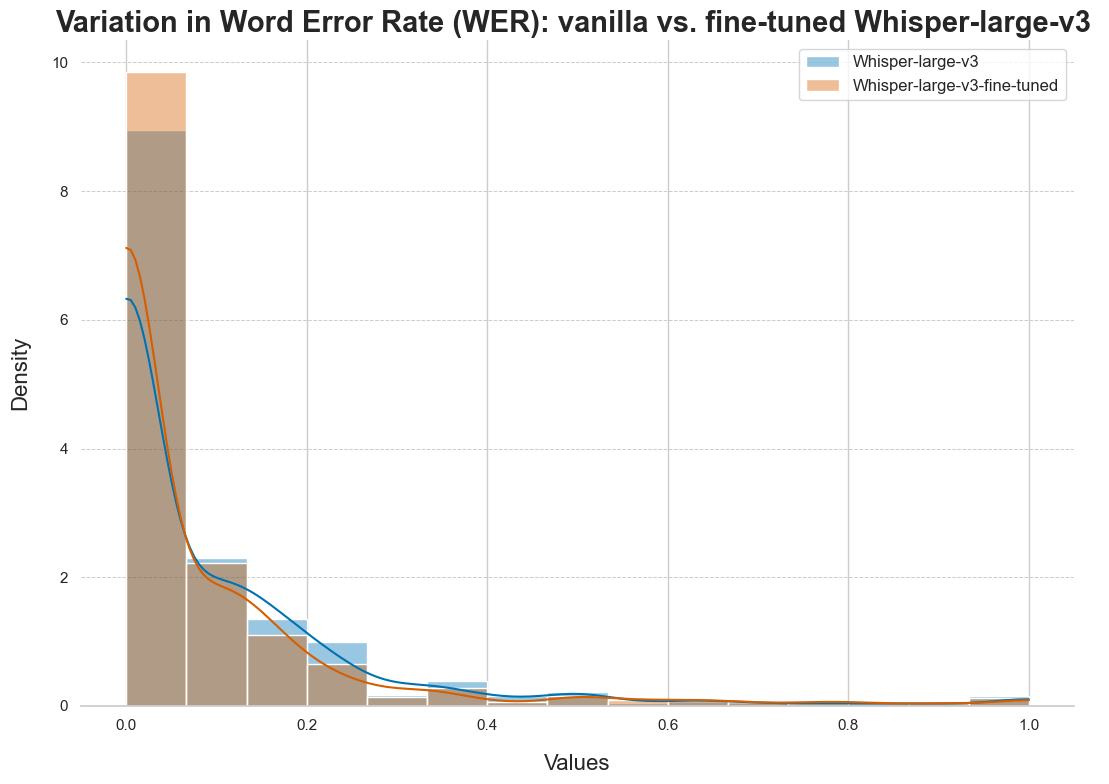

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid", palette="colorblind")

# Create the figure and the histograms
plt.figure(figsize=(11, 8))

# Plot histograms
sns.histplot(df['Whisper-large-v3'], color='#0072B2', label='Whisper-large-v3', kde=True, stat="density", bins=15, alpha=0.4)
sns.histplot(df['Whisper-large-v3-fine-tuned'], color='#D55E00', label='Whisper-large-v3-fine-tuned', kde=True, stat="density", bins=15, alpha=0.4)



# Add annotation and customize outlay
plt.title("Variation in Word Error Rate (WER): vanilla vs. fine-tuned Whisper-large-v3 ", fontsize=21, fontweight='bold')
plt.xlabel("Values", fontsize=16, labelpad=15)
plt.ylabel("Density", fontsize=16, labelpad=15)
plt.legend(fontsize=12, loc='upper right', frameon=True)


sns.despine(left=True)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.savefig('performance_results/WER_histo_Whisper_ft.png', dpi = 180)
plt.show()
